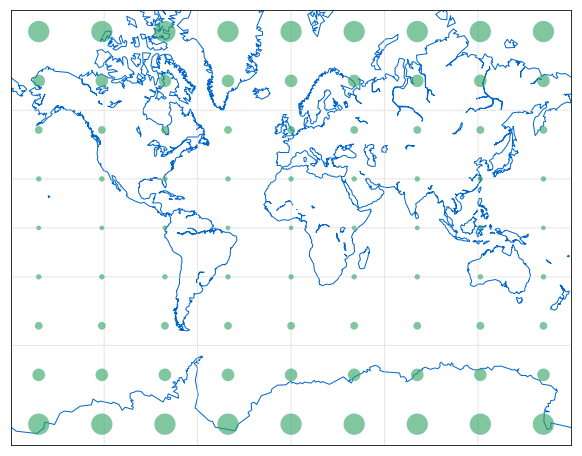

In [91]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

# Create a Basemap instance that uses the mercator projection
m = Basemap(projection='merc',urcrnrlat=80, llcrnrlat=-80,llcrnrlon=-180, urcrnrlon=180)   

m.drawcoastlines(color='#0066CC')

# Draw lines of latitude (parallels) and longitude (meridians)
m.drawparallels(range(-90,91,30), color='#CCCCCC')
m.drawmeridians(range(-180,181,60), color='#CCCCCC')

# draw tissot's indicatrix to show distortion.
for y in np.linspace(m.ymax/20, 19*m.ymax/20, 9):
    for x in np.linspace(m.xmax/20, 19*m.xmax/20, 9):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon, lat, 1.5, 100, facecolor='#2ca25f', zorder=10, alpha=0.6);

plt.show()

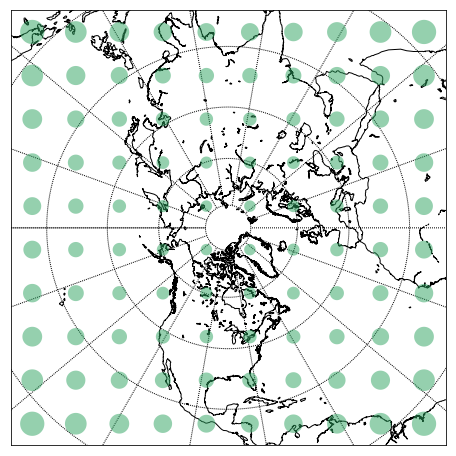

In [92]:
plt.figure(figsize=(16,8))
m = Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

for y in np.linspace(m.ymax/20,19*m.ymax/20,10):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,10):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='#2ca25f',zorder=10,alpha=0.5)
plt.show()

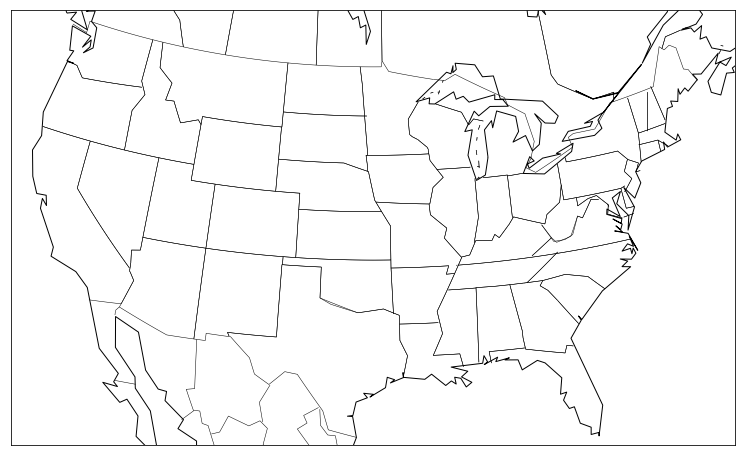

In [93]:
plt.figure(figsize=(16,8))
m = Basemap(width=5e6,height=3e6,projection='laea',boundinglat=10,
        resolution='c',lat_0=39, lon_0=-96)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.show()

<Figure size 1152x576 with 0 Axes>

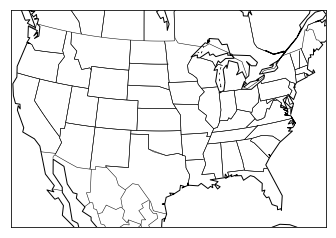

In [94]:
plt.figure(figsize=(16,8))
plt.figure()
m = Basemap(
    llcrnrlon=-119,
    llcrnrlat=22,
    urcrnrlon=-64,
    urcrnrlat=49,
    projection='lcc',
    lat_1=39,
    lon_0=-98
   )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
plt.show()

In [95]:
import geopandas as gpd
light=gpd.read_file('output/light.shp',encoding='utf-8')
light=light[light.is_valid]
light=light[light['district']=='永和區']
light.crs = {'init' :'epsg:3826'} # 避免資料沒設，這邊再重新給一次
light=light.to_crs(epsg=4326)

import geohash
light['geohash']=[geohash.encode(row['geometry'].y,row['geometry'].x, precision=7) for idx,row in light.iterrows()]

group=light.groupby('geohash')
group=group.size().reset_index(name='counts')

from shapely.geometry import Polygon
geohashs=[]
for idx,row in group.iterrows():
    decoded=geohash.bbox(row['geohash'])
    geohashs.append(Polygon([(decoded['s'], decoded['w']), (decoded['s'],decoded['e']), (decoded['n'], decoded['e']), (decoded['n'],decoded['w'])]))
g = gpd.GeoSeries(geohashs)

g_aggr = gpd.GeoDataFrame(group)
g_aggr['geometry']=g

In [96]:
g_aggr['counts'].max()
g_aggr['counts'].min()

1

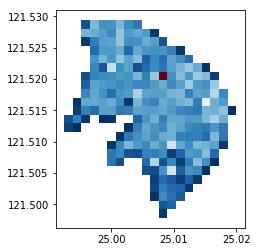

In [97]:
g_aggr.plot('counts',cmap='RdBu_r')

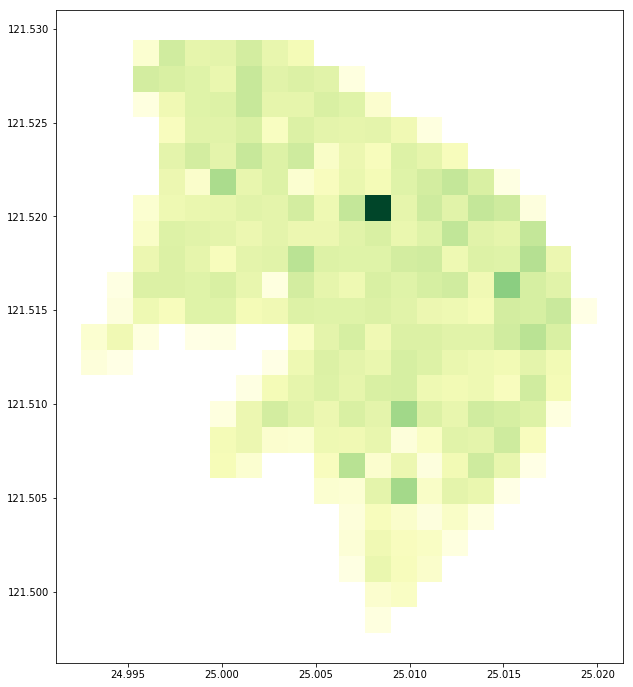

In [98]:
g_aggr.plot('counts',cmap='YlGn', figsize=(12, 12))

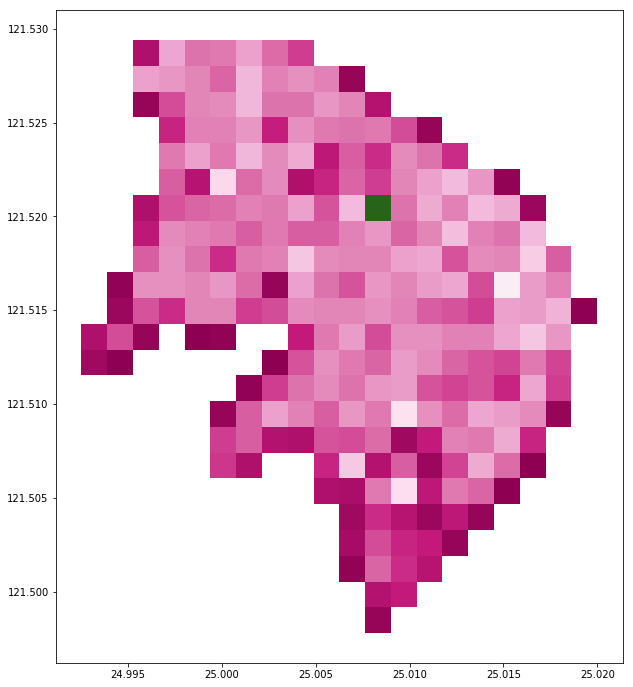

In [99]:
g_aggr.plot('counts',cmap='PiYG', figsize=(12, 12))

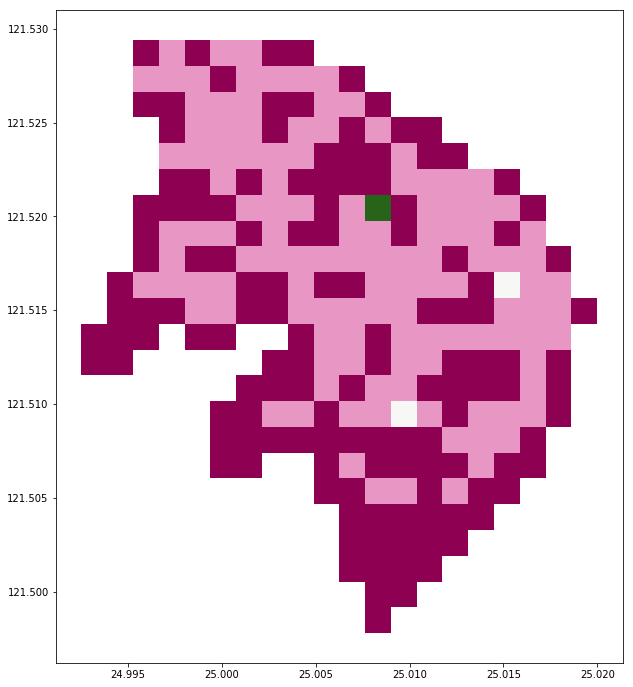

In [100]:
g_aggr.plot('counts',cmap='PiYG', scheme = 'equal_interval', figsize=(12, 12))


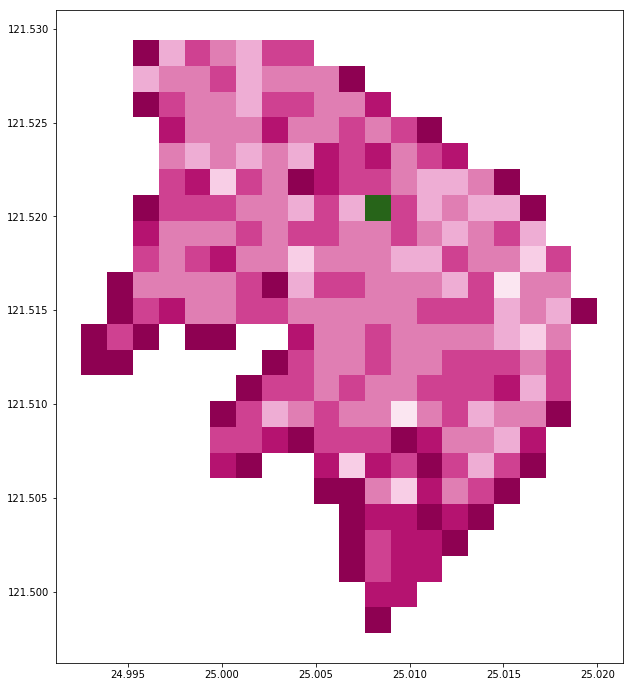

In [101]:
g_aggr.plot('counts',cmap='PiYG', scheme = 'equal_interval',k=15, figsize=(12, 12))